In [1]:
%matplotlib notebook

In [2]:
import matplotlib.ticker
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
frame = pd.read_csv("data/interim/sampling-frame.tsv", sep = "\t")

# Frame stratification

In [4]:
pd.DataFrame(frame["project_group"].value_counts())

,project_group
enwiki,18193
dewiki,3659
cee_wps,3394
commons,3324
jawiki,3122
frwiki,3022
eswiki,2489
ruwiki,2273
other,1940
meaf_wps,1937


In [5]:
# Round the highest edit count up to the nearest hundred thousand,
# in order to make a pretty edge for the top bin
top_edge = int(np.ceil(frame["global_edits"].max() / 100000) * 100000)

# See readme for why we picked these bins
edit_bins = [10, 30, 150, 600, 1200, top_edge]

frame["binned_edits"] = pd.cut(frame["global_edits"], edit_bins, right=False)

In [6]:
frame["binned_edits"].value_counts(sort = False)

[10, 30)            3105
[30, 150)          14766
[150, 600)         14590
[600, 1200)         6099
[1200, 2600000)    14579
Name: binned_edits, dtype: int64

In [7]:
frame.groupby(["project_group", "binned_edits"]).size().unstack()

binned_edits,"[10, 30)","[30, 150)","[150, 600)","[600, 1200)","[1200, 2600000)"
project_group,,,,,
arwiki,50,116,99,40,124
asia_wps,44,165,172,92,234
cee_wps,175,825,860,417,1117
commons,171,622,615,352,1564
dewiki,146,853,1055,490,1115
enwiki,1126,5866,5312,1944,3945
eswiki,201,741,695,298,554
frwiki,170,841,791,354,866
itwiki,108,466,461,192,469


# Distribution of yearly edit counts

<IPython.core.display.Javascript object>


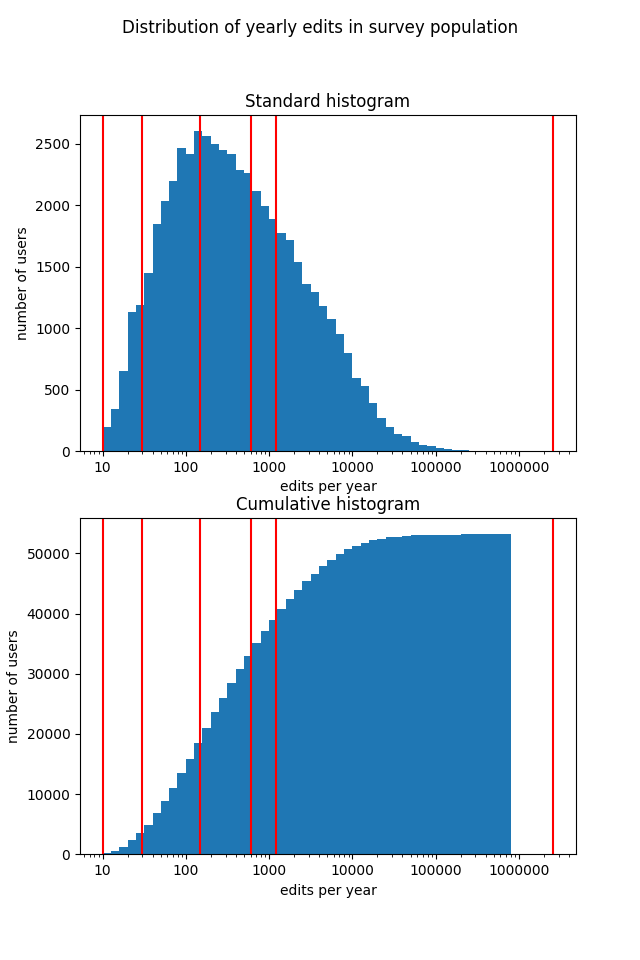

In [8]:
fig_size = plt.rcParams["figure.figsize"]

fig, (ax1, ax2) = plt.subplots(
    # 2 rows, 1 column
    2, 1,
    # Make the figure double height
    figsize = (fig_size[0], fig_size[1] * 2),
)

fig.suptitle("Distribution of yearly edits in survey population")

def set_common(ax, cumulative = False):
    ax.hist(
        frame["global_edits"],
        bins = 10**np.arange(1, 6, 0.1),
        cumulative = cumulative
    )
    
    ax.set_xscale("log", basex = 10)
    ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter("%d"))
    
    
    ax.set_ylabel("number of users")
    ax.set_xlabel("edits per year")

    for edge in edit_bins:
        ax.axvline(x = edge, color = "red")

set_common(ax1)
set_common(ax2, True)
ax1.set_title("Standard histogram")
ax2.set_title("Cumulative histogram")

plt.show()